In [6]:
import os

# if "KERAS_BACKEND" not in os.environ:
    # set this to "torch", "tensorflow", or "jax"
os.environ["KERAS_BACKEND"] = "torch"

print(f'Backend: {os.environ["KERAS_BACKEND"]}')

import sys
# sys.path.append('../')


Backend: torch


Function Trials:

In [9]:
import bayesflow as bf
import keras
import numpy as np
import sys
import pandas as pd
import seaborn as sns
import time
from numba import njit

myhost = os.uname()[1]


index = 496
design_grid_num = 6
slurm_id = 'PC'
model_title =  None
design_grid_num = 6
model_title = 'new_bf_modular_test'
design_grid_dir = '/data/design_grid' + str(design_grid_num) + '.csv'


#%%

model_info = {
    'model_title': model_title,
    'link_function': None, # choose 'normal cdf' to transform normals to uniform priors
    'normal_restriction': 'positive only',
    'model': 'dmc',
    'log_file': 'dmc_log_file.csv',
    'slurm_id': slurm_id,
    'write_log': True,
    'load_pretrained': True,
    'save_plots': True,
    'compute_mmd': True,
    'plot_mms': False,
    'plot_dataspace': True,
    'save_rt_data': False,
    'x0_var': 'trial', # or 'fixed' -> specify X0_beta_shape
    'a_var': 'estimated', # or 'fixed'
    'a_value': None,
    'n_epochs': 100,
    'n_iterations': 1000,
    'min_obs': 50,
    'max_obs': 2000,
    'n_conditions': 2,
    'batch_size': 32,
    'save_posterior_data': True,
    'n_summary_dims': 32,
    'coupling_design': "spline", # oder spline
    'n_coupling_layers': 12,
    'n_validation_sims': 200,
    'early_stopping': False,
    ## Priors ##
    'X0_beta_shape_fixed': 3,
    'X0_value': 0,
    'tmax': 1200,
    'sigma': 4,
    'dt': 1,
    'n_recovery_simulations': 1000,
    'n_posterior_samples': 10000,
    'simulation_function': 'vectorized',
    'nonconvergents': 'resampled',
    'dir_design_grid': design_grid_dir,
    # 'start_time': model_start,
    'comment': 'extended x_shape range (Luo & proctor, 2022), a fixed',
    'attention_setting_key_dim': 128,
    'num_heads': 8,
    'num_inducing_points': 32,
    'num_seeds': 4,
    'num_dense_fc': 2,
    'dense_setting_units': 256,
    'dense_setting_activation': 'relu',
    'min_scale_alpha': 1,
    'max_scale_alpha': 1,
    'learning_rate': 5e-4}

parent_dir = '/Users/simonschaefer/Documents/BF-LIGHT'

script_dir = str(parent_dir) + '/models'

functions_dir = parent_dir + '/functions'

model_data_dir = parent_dir + '/model_data'

model_dir = parent_dir + '/models'

figure_path = parent_dir + '/plots/' + model_title + '/' + model_title

print('script_dir = '+script_dir)
print('parent_dir = '+parent_dir)
print('functions_dir = '+functions_dir)
print('model_data_dir = '+model_data_dir)
print('model_dir = '+model_dir)
print('design_grid_dir = '+design_grid_dir)

sys.path.append(functions_dir)

import dmc_modules as dmc


script_dir = /Users/simonschaefer/Documents/BF-LIGHT/models
parent_dir = /Users/simonschaefer/Documents/BF-LIGHT
functions_dir = /Users/simonschaefer/Documents/BF-LIGHT/functions
model_data_dir = /Users/simonschaefer/Documents/BF-LIGHT/model_data
model_dir = /Users/simonschaefer/Documents/BF-LIGHT/models
design_grid_dir = /data/design_grid6.csv


'x-ray-199.dynamic2.rpi.edu'

In [62]:
def meta_fun():

    N = int(np.random.randint(50, 1000))

    # n_obs = np.repeat(n, n)
    
    # condition_mat = condition_matrix(n_obs, 2)

    return dict(N = N)

test_meta = meta_fun()

# print(f"Test A Prior: {test_prior['A']}")
# print(f"Test Context: {test_meta['context']}")
print(f"Test N_OBS: {test_meta['N']}")

print(f"Test N_OBS first element: {test_meta['N']}")

Test N_OBS: 758
Test N_OBS first element: 758


In [64]:

start_time = time.time()
data_set = experiment(test_prior['A'], 
                      test_prior['tau'],
                      test_prior['mu_c'],
                      test_prior['mu_r'],
                      test_prior['b'],
                      test_meta['N'])
end_time = time.time()
print(f"Computation 1 Data set takes {round(end_time-start_time, 3)} ms")

print(f"{data_set['rt'].shape}")
print(f"{data_set['acc'].shape}")
print(f"{data_set['context'].shape}")
# print(f"{data_set['N'].shape}")


Computation 1 Data set takes 0.091 ms
(758,)
(758,)
(758,)


In [65]:

test_prior = prior()

# %timeit experiment(test_prior['A'], test_prior['tau'], test_prior['mu_c'], test_prior['mu_r'], test_prior['b'],test_meta['N'])

In [66]:
simulator = bf.simulators.make_simulator([prior, experiment], meta_fn = meta_fun)
simulator

In [67]:
num_sims = 10

start_time = time.time()

test_simulator = simulator.sample(num_sims)

end_time = time.time()
print(f"Computation per Data set takes {round((end_time-start_time)/num_sims, 3)} ms")

Computation per Data set takes 0.02 ms


In [68]:
# print(f"Number of Observations: {test_simulator['N']}")
print(f"Number of Observations shape: {test_simulator['N']}")
# print(f"Number of Observations shape: {test_simulator['N'].shape}")
print(f"A Prior shape: {test_simulator['A'].shape}")
print(f"tau Prior shape: {test_simulator['tau'].shape}")
print(f"RT shape: {test_simulator['rt'].shape}")
print(f"Accuracy shape: {test_simulator['acc'].shape}")

print(f"Context shape: {test_simulator['context'].shape}")
print(f"N shape: {test_simulator['N'].shape}")

# print(f"Congruency shape: {test_simulator['congruency'].shape}")

Number of Observations shape: [[246]
 [246]
 [246]
 [246]
 [246]
 [246]
 [246]
 [246]
 [246]
 [246]]
A Prior shape: (10, 1)
tau Prior shape: (10, 1)
RT shape: (10, 246)
Accuracy shape: (10, 246)
Context shape: (10, 246)
N shape: (10, 1)


In [69]:

par_keys = ["A", "tau", "mu_c", "mu_r", "b"]

par_names = [r'$A$', r'$\tau$', r'$\mu_c$',r'$\mu_r$', r'$b$']



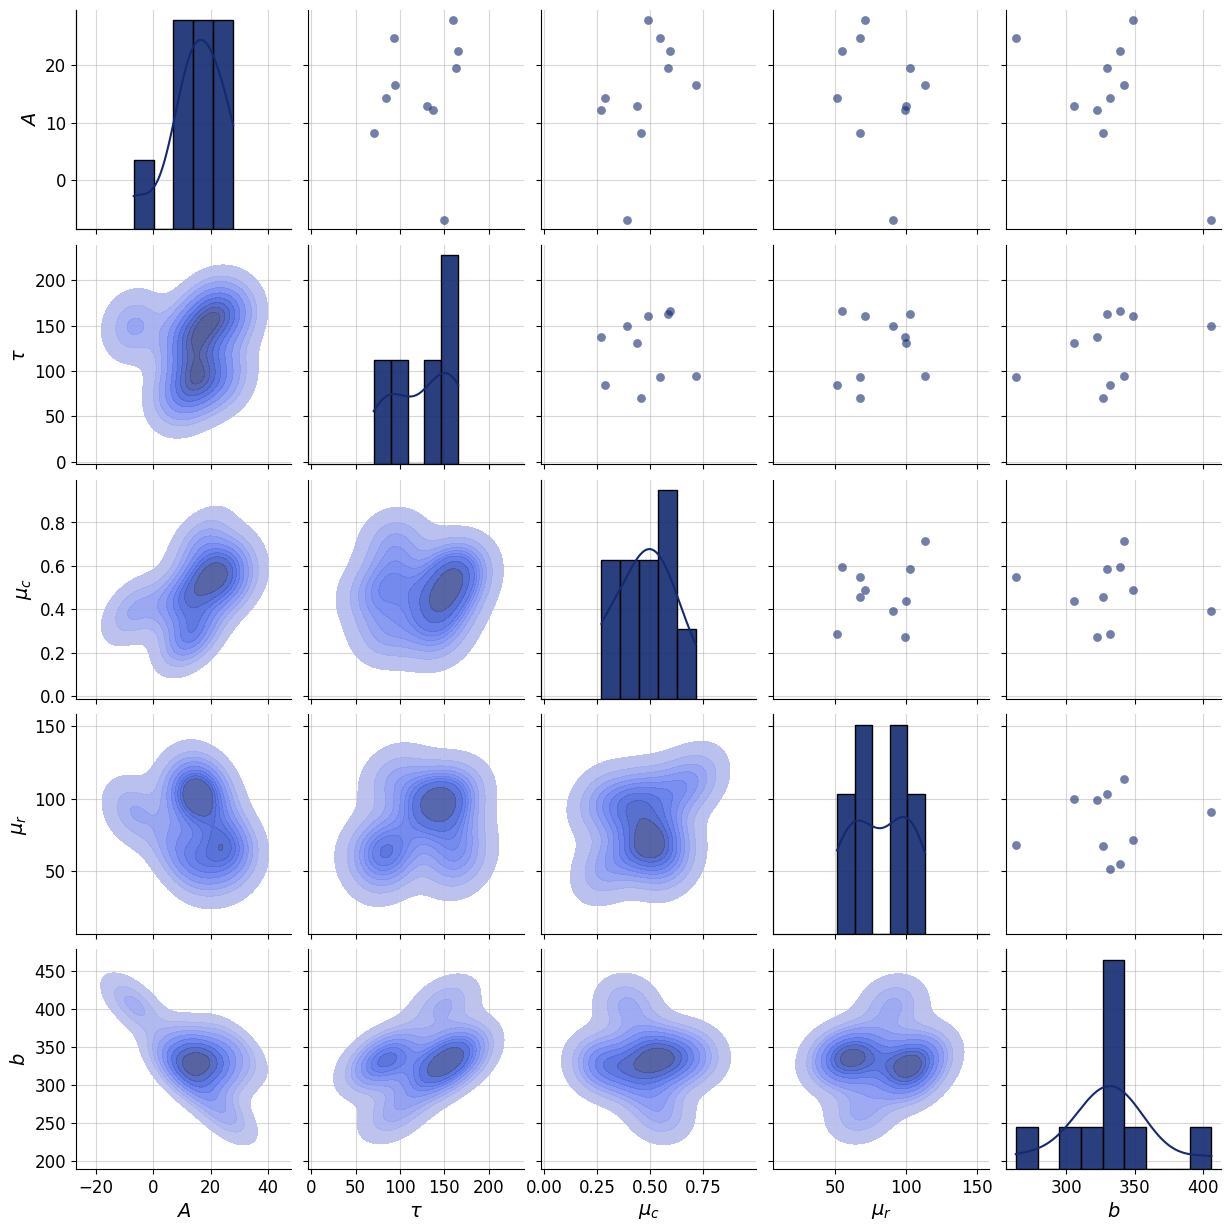

In [70]:


f = bf.diagnostics.plots.pairs_samples(
    samples=test_simulator,
    variable_keys=par_keys,
    variable_names=par_names
)



In [72]:
# adapter = (
#     bf.Adapter()
#     .to_array()
#     .convert_dtype("float64", "float32")
#     .broadcast("N", to="rt")
#     .broadcast("N", to="context")  
#     .sqrt('N')
#     .as_set(["rt", "acc"])
#     .concatenate(["A", "tau", "mu_c", "mu_r", "b"], into="inference_variables")
#     .concatenate(["rt", "acc"], into="summary_variables")
#     .apply("N", lambda x: np.repeat(x, repeats=N, axis=1)[..., None])
#     # .rename("N", "inference_conditions")
#     .concatenate(["N", "context"], into="inference_conditions", ax) 
# )

adapter = (
    bf.Adapter()
    # .to_array()
    .convert_dtype("float64", "float32")
    # .constrain(["A", "tau", "mu_c", "mu_r", "b"], lower = 0)
    # .broadcast("N", to="context")  # Broadcast N to match context's shape
    .sqrt('N')
    .broadcast("N", to="rt")
    .standardize(include = ["A", "tau", "mu_c", "mu_r", "b"])
    .as_set(["rt", "acc", "context"])
    .concatenate(["A", "tau", "mu_c", "mu_r", "b"], into="inference_variables")
    .concatenate(["rt", "acc", 'context'], into="summary_variables")
    .concatenate(["N"], into="inference_conditions")
    # .rename("N","inference_conditions")  # Concatenate both variables
)

# adapter.broadcast

test_data =simulator.sample(10)

processed_draws = adapter(test_data)


In [73]:


# processed_draws = adapter(test_simulator)
print(processed_draws["summary_variables"].shape)
print(processed_draws["inference_conditions"].shape)
print(processed_draws["inference_variables"].shape)
# print(processed_draws["N"].shape)
processed_draws.keys()

# processed_draws["inference_conditions"]

(10, 358, 3)
(10, 1)
(10, 5)


dict_keys(['inference_variables', 'summary_variables', 'inference_conditions'])

In [77]:
processed_draws['inference_conditions']

array([[18.920887],
       [18.920887],
       [18.920887],
       [18.920887],
       [18.920887],
       [18.920887],
       [18.920887],
       [18.920887],
       [18.920887],
       [18.920887]], dtype=float32)

In [78]:
print(processed_draws["inference_conditions"])

[[18.920887]
 [18.920887]
 [18.920887]
 [18.920887]
 [18.920887]
 [18.920887]
 [18.920887]
 [18.920887]
 [18.920887]
 [18.920887]]


In [79]:
num_training_batches = 128
num_validation_batches = 16
batch_size = 16
epochs = 1

# training_data = simulator.sample(num_training_batches * batch_size,)
# validation_data = simulator.sample(num_validation_batches * batch_size,)


In [81]:
summary_network = bf.networks.SetTransformer(summary_dim = 32,
                                             embed_dims = (128, 128), 
                                             num_seeds = 8,
                                             num_inducing_points = 50)
 
inference_network = bf.networks.CouplingFlow(subnet="mlp", transform="spline", depth=5)


In [83]:
workflow = bf.BasicWorkflow(
    simulator=simulator,
    adapter=adapter,
    inference_network=inference_network,
    summary_network=summary_network,
    inference_variables=["A", "tau", "mu_c", "mu_r", "b"]
)


In [84]:

# history = workflow.fit_offline(training_data, epochs=300, batch_size=64, validation_data=validation_data)

history = workflow.fit_online(epochs=100, batch_size=16, num_batches_per_epoch=1000)

INFO:bayesflow:Fitting on dataset instance of OnlineDataset.
INFO:bayesflow:Building on a test batch.
/Users/simonschaefer/anaconda3/envs/bf_new/lib/python3.11/site-packages/keras/src/layers/layer.py:1407: UserWarning: Layer 'induced_set_attention_block' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''Exception encountered when calling MultiHeadAttentionBlock.call().

got an unexpected keyword argument 'kwargs'

Arguments received by MultiHeadAttentionBlock.c

Epoch 1/100
 104/1000 ━━━━━━━━━━━━━━━━━━━━ 44:10 3s/step - loss: 7.8500 - loss/inference_loss: 7.8500

KeyboardInterrupt: 

In [ ]:
training_data = workflow.simulate(5000)
validation_data = workflow.simulate(300)

history = workflow.fit_offline(training_data, epochs=300, batch_size=64, validation_data=validation_data)

dict_keys(['N', 'A', 'tau', 'mu_c', 'mu_r', 'b', 'rt', 'acc', 'context'])

In [30]:
ordered_keys = ['rt', 'acc', 'context', 'N', 'A', 'tau', 'mu_c', 'mu_r', 'b']
validation_data = {key: validation_data[key] for key in ordered_keys}


In [31]:
validation_data.keys()

dict_keys(['rt', 'acc', 'context', 'N', 'A', 'tau', 'mu_c', 'mu_r', 'b'])

In [32]:
print(f"N simulator: {validation_data['N']}")
print(f"N shape adapter: {adapter(validation_data)['inference_conditions'].shape}")

N simulator: [[491 491 491 ... 491 491 491]
 [491 491 491 ... 491 491 491]
 [491 491 491 ... 491 491 491]
 ...
 [491 491 491 ... 491 491 491]
 [491 491 491 ... 491 491 491]
 [491 491 491 ... 491 491 491]]
N shape adapter: (64, 491)


In [33]:
# convert to offline data set

val_dataset = bf.datasets.OfflineDataset(
    data=validation_data, 
    batch_size=batch_size, 
    adapter=adapter
)

In [34]:
training_data = simulator.sample(64)

In [35]:
training_data.keys()

dict_keys(['N', 'A', 'tau', 'mu_c', 'mu_r', 'b', 'rt', 'acc', 'context'])

In [178]:
ordered_keys = ['rt', 'acc', 'context', 'N', 'A', 'tau', 'mu_c', 'mu_r', 'b']
training_data = {key: training_data[key] for key in ordered_keys}

training_data.keys()

adapter(training_data).keys()

dict_keys(['inference_variables', 'summary_variables', 'inference_conditions'])

In [179]:
print(f"N simulator: {training_data['N']}")
print(f"N shape adapter: {adapter(training_data)['inference_conditions'].shape}")

N simulator: [[960 960 960 ... 960 960 960]
 [960 960 960 ... 960 960 960]
 [960 960 960 ... 960 960 960]
 ...
 [960 960 960 ... 960 960 960]
 [960 960 960 ... 960 960 960]
 [960 960 960 ... 960 960 960]]
N shape adapter: (64, 960)


In [180]:
# reformat to offline data
train_dataset = bf.datasets.OfflineDataset(
    data=training_data, 
    batch_size=batch_size, 
    adapter=adapter
)

In [181]:
type(train_dataset)

bayesflow.datasets.offline_dataset.OfflineDataset

In [182]:
train_dataset.num_batches

4

In [183]:
# train_dataset.__getitem__(1)
item = 1
item = slice(item * batch_size, (item + 1) * batch_size)

print(f"item: {item}")


item: slice(16, 32, None)


In [184]:
item = train_dataset.indices[item]

In [185]:
iterator = iter(train_dataset.data.items())

# Loop through and get all items
for item in iterator:
    print(item)

('rt', array([[1.51275058, 0.79275058, 0.42675058, ..., 0.23975058, 0.62875058,
        0.28475058],
       [0.34064071, 0.56264071, 0.70764071, ..., 0.87364071, 0.84364071,
        0.36964071],
       [0.71929182, 0.78829182, 0.49029182, ..., 0.53029182, 0.26129182,
        0.85729182],
       ...,
       [1.24244219, 1.54044219, 0.93644219, ..., 0.55644219, 0.73544219,
        0.47944219],
       [0.31578893, 0.44778893, 0.69478893, ..., 1.36778893, 0.14878893,
        0.91778893],
       [0.50545653, 0.50745653, 0.62245653, ..., 0.47345653, 0.34845653,
        0.42245653]]))
('acc', array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]]))
('context', array([[0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1,

In [168]:

# for item in iterator:
#     key, value = next(iter(train_dataset.data.items()))

#     print(f"key: {key}, value: {value}")

In [ ]:
# np.take(value, item, axis = 0)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
# batch = {key: np.take(value, item, axis=0) for key, value in train_dataset.data.items()}

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [94]:
key

'rt'

In [188]:
dropout = 0.05
initial_learning_rate = 5e-4

# Create inference net
# sigma2 = keras.ops.var(train_samples["parameters"].astype("float32"), axis=0, keepdims=True)

inference_network = bf.networks.CouplingFlow(subnet="mlp", transform="spline", depth=12)

summary_net = bf.networks.transformers.SetTransformer(summary_dim = 32)

# Create optimizer
scheduled_lr = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=epochs*train_dataset.num_batches,
    alpha=1e-8
)
optimizer = keras.optimizers.Adam(learning_rate=scheduled_lr)


# Create approximator
approximator = bf.ContinuousApproximator(
   inference_network=inference_network,
   summary_network=summary_net,
   adapter=adapter
)

approximator.compile(optimizer=optimizer)
# Train and compute the average of last 5 validation losses
history = approximator.fit(
    epochs=epochs,
    dataset=train_dataset,
    validation_data=val_dataset
    # verbose=0
)

INFO:bayesflow:Fitting on dataset instance of OfflineDataset.
INFO:bayesflow:Building on a test batch.


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - loss: 7154398.5000 - loss/inference_loss: 7154398.5000 

ValueError: Exception encountered when calling ConfigurableHiddenBlock.call().

[1mInput 0 of layer "dense_87" is incompatible with the layer: expected axis -1 of input shape to have value 994, but received input with shape (16, 584)[0m

Arguments received by ConfigurableHiddenBlock.call():
  • inputs=torch.Tensor(shape=torch.Size([16, 584]), dtype=float32)
  • training=False
  • kwargs=<class 'inspect._empty'>

In [479]:
### define objective function

def objective(epochs=30):
    
    # Hardcode hyperparameters
#     max_time = 10
#     width = 256
#     depth = 6
    dropout = 0.05
    initial_learning_rate = 5e-4
    
    # Create inference net
    # sigma2 = keras.ops.var(train_samples["parameters"].astype("float32"), axis=0, keepdims=True)
    
    inference_network = bf.networks.CouplingFlow(subnet="mlp", transform="spline", depth=12)

    summary_net = bf.networks.transformers.SetTransformer(summary_dim = 32)

    # Create optimizer
    scheduled_lr = keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=initial_learning_rate,
        decay_steps=epochs*train_dataset.num_batches,
        alpha=1e-8
    )
    optimizer = keras.optimizers.Adam(learning_rate=scheduled_lr)
    
    
    # Create approximator
    approximator = bf.ContinuousApproximator(
        inference_network=inference_network,
        summary_network=summary_net,
        adapter=adapter,
    )
    approximator.compile(optimizer=optimizer)
    
    # Train and compute the average of last 5 validation losses
    history = approximator.fit(
        epochs=epochs,
        dataset=train_dataset,
        validation_data=val_dataset,
        verbose=0
    )
    return np.mean(history.history["val_loss"][-5:])


In [480]:
print("Validation loss: {}".format(objective()))

INFO:bayesflow:Fitting on dataset instance of OfflineDataset.
INFO:bayesflow:Building on a test batch.


IndexError: index 435 is out of bounds for axis 0 with size 1

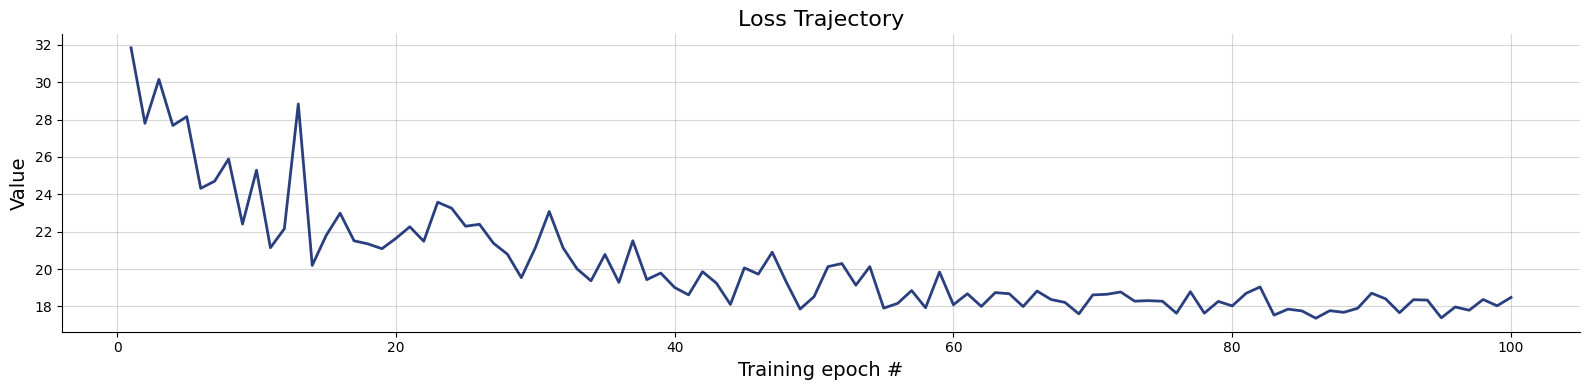

In [50]:
f = bf.diagnostics.plots.loss(history)


In [51]:

# Set the number of posterior draws you want to get
num_samples = 1000

# Simulate validation data (unseen during training)
val_sims = simulator.sample(200)

# Obtain num_samples samples of the parameter posterior for every validation dataset
post_draws = approximator.sample(conditions=val_sims, num_samples=num_samples)

# post_draws is a dictionary of draws with one element per named parameters
post_draws.keys() 



dict_keys(['A', 'tau', 'mu_c', 'mu_r', 'b'])

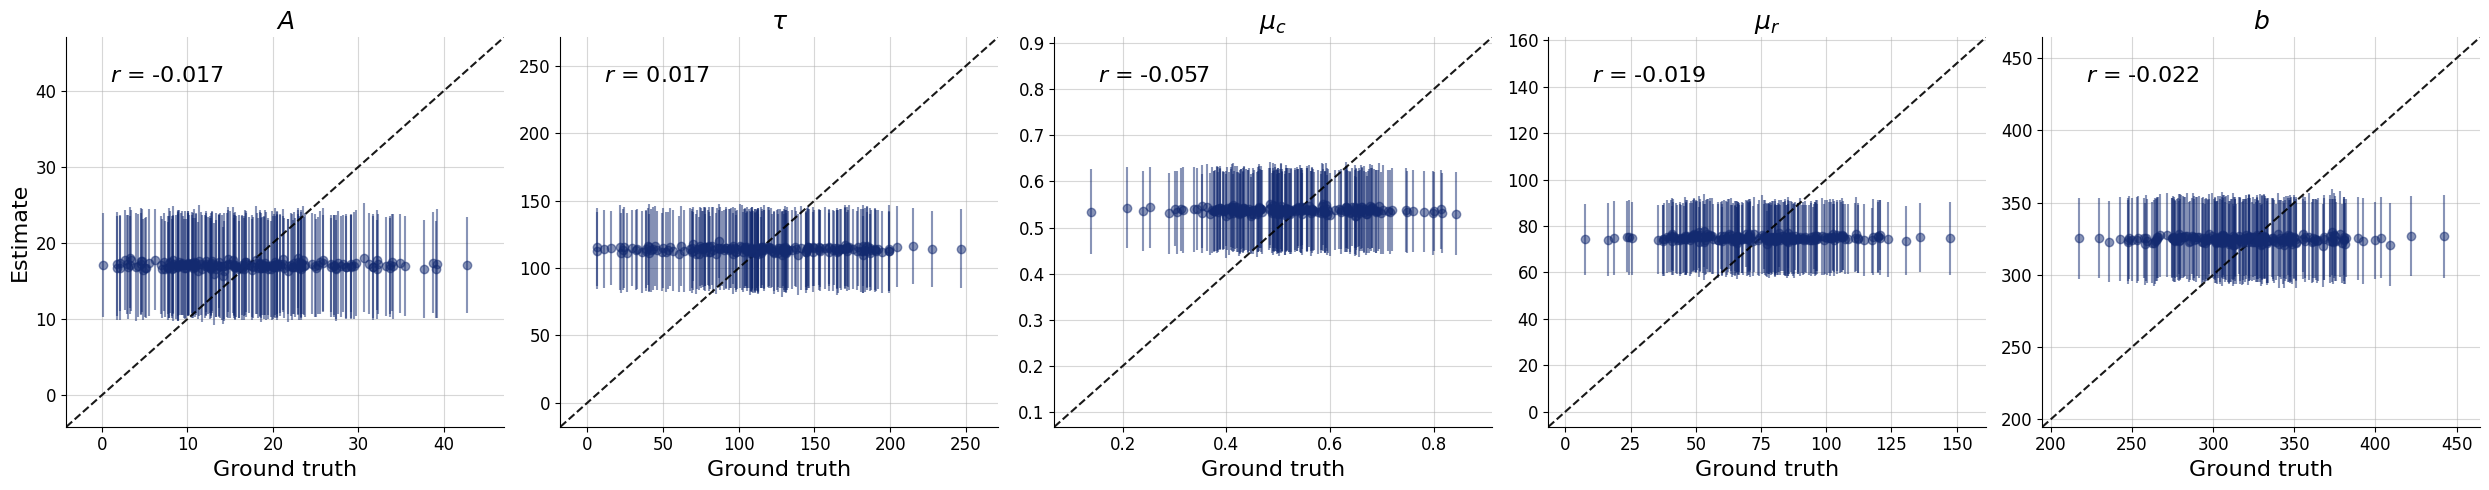

In [52]:


f = bf.diagnostics.plots.recovery(
    estimates=post_draws, 
    targets=val_sims,
    variable_names=par_names
)



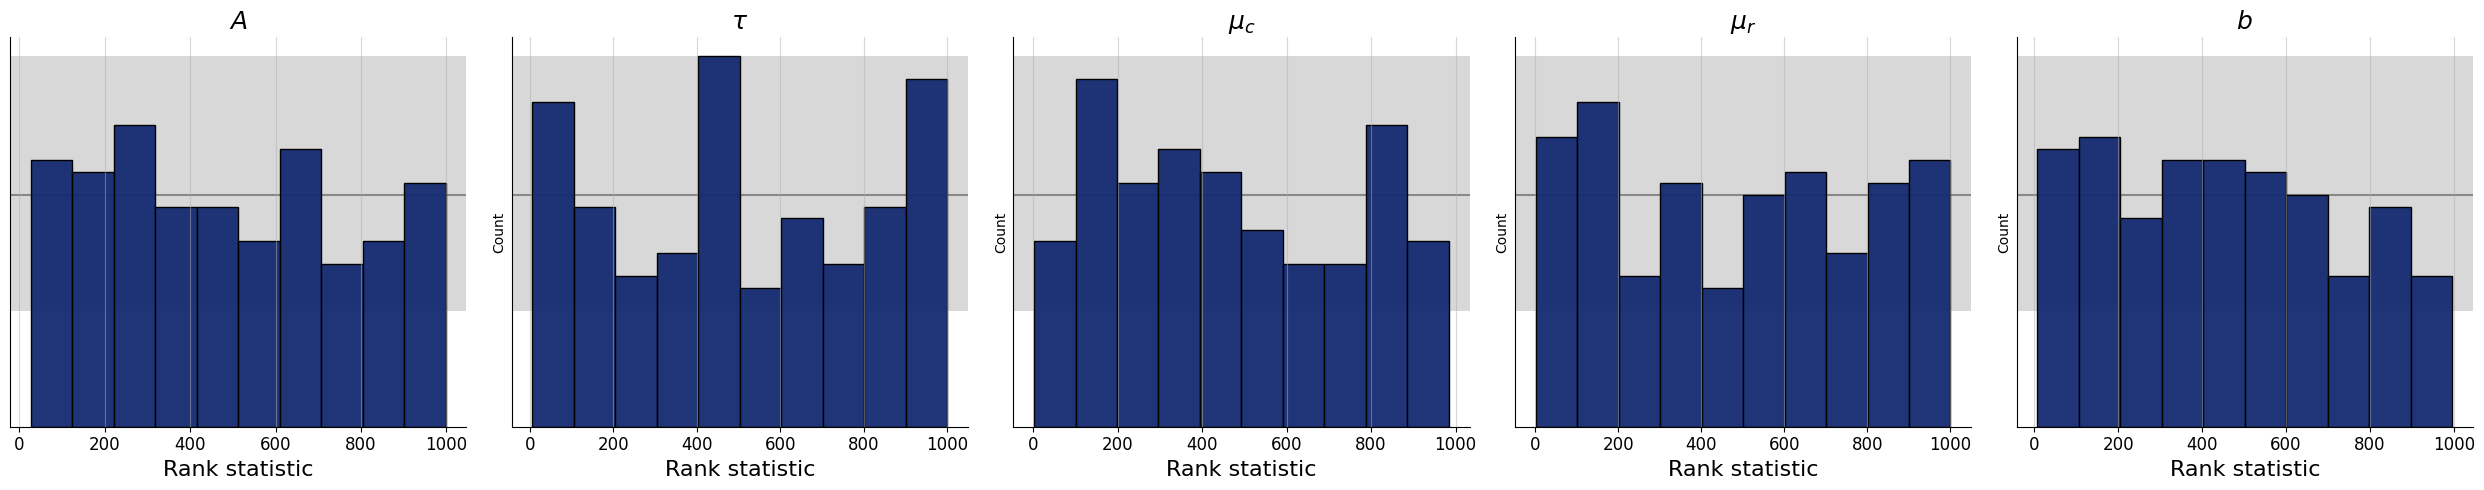

In [53]:


f = bf.diagnostics.plots.calibration_histogram(
    estimates=post_draws, 
    targets=val_sims,
    variable_names=par_names
)



In [136]:
def objective(epochs=5):
    
    # Hardcode hyperparameters
    # max_time = 10
    # width = 256
    # depth = 6
    # dropout = 0.05
    initial_learning_rate = 5e-4
    
    # Create inference net
    inference_network = bf.networks.CouplingFlow()

    # Create Summary Net
    summary_network = bf.networks.SetTransformer()
    
    
    # Create optimizer
    scheduled_lr = keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=initial_learning_rate,
        decay_steps=epochs*int(training_data['rt'].shape[0]/batch_size),
        alpha=1e-8
    )
    optimizer = keras.optimizers.Adam(learning_rate=scheduled_lr)

    
    
    # Create approximator
    approximator = bf.ContinuousApproximator(
    inference_network=inference_network,
    summary_network=summary_network,
    adapter=adapter)


    approximator.compile(optimizer=optimizer)
    
    # Train and compute the average of last 5 validation losses
    history = approximator.fit(
        epochs=epochs,
        dataset=training_data,
        validation_data=validation_data,
        verbose=0
    )
    # return np.mean(history.history["val_loss"][-5:])
